<h1><center>USA Housing Price Prediction</center></h1>

Here we will perform many regression algorithms to see the accuracy score (`testing_score`) of the data and compare which model performs the best 

# 1 . Importing Libraries

In [1]:
# importing the required libraries

# importing plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# importing data tools
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score , mean_absolute_error, mean_squared_error
from scipy.stats import pearsonr

# importing data normalisation and standardization tool 
from sklearn.preprocessing import StandardScaler , MinMaxScaler, PolynomialFeatures, LabelEncoder

# importing algorithms
from sklearn.linear_model import LinearRegression, BayesianRidge , PoissonRegressor 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor , RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor , ExtraTreeRegressor
from xgboost import XGBRegressor , XGBRFRegressor

# 2 . Importing the Dataset

In [2]:
# importing the housing price dataset
housing_df = pd.read_csv("USA_housing_parsed_data.csv")

# verifying the unnamed column doesn't exist for future references
if 'Unnamed: 0' in housing_df.columns:
    housing_df = housing_df.drop(columns=['Unnamed: 0'])



# 3 . Data Exploration & Cleaning

In [3]:
housing_df.head(5)

,income,house_area,noof_rooms,noof_bedrooms,population,price,Address,street_address,city_names,state_name,state_abbr,postal_code,state_wise category,categorized_postal_code,cnf_USA_state
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701...",208 Michael Ferry Apt. 674,Laurabury,Nebraska,NE,208,37,835,True
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA...",188 Johnson Views Suite 079,Lake Kathleen,California,CA,188,8,746,True
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482...",9127 Elizabeth Stravenue,Danieltown,Wisconsin,WI,9127,59,3694,True
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820,USS Barnett,FPO,Unknown,AP,44820,4,1814,False
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386,USNS Raymond,FPO,Unknown,AE,09386,1,391,False


In [4]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   income                   5000 non-null   float64
 1   house_area               5000 non-null   float64
 2   noof_rooms               5000 non-null   float64
 3   noof_bedrooms            5000 non-null   float64
 4   population               5000 non-null   float64
 5   price                    5000 non-null   float64
 6   Address                  5000 non-null   object 
 7   street_address           5000 non-null   object 
 8   city_names               5000 non-null   object 
 9   state_name               5000 non-null   object 
 10  state_abbr               5000 non-null   object 
 11  postal_code              5000 non-null   object 
 12  state_wise category      5000 non-null   int64  
 13  categorized_postal_code  5000 non-null   int64  
 14  cnf_USA_state           

### Checking for duplicate values

In [5]:
# to check whether there are any duplicated values
housing_df.duplicated().sum()

0

### Checking for missing values

In [6]:
housing_df.isna().sum()

income                     0
house_area                 0
noof_rooms                 0
noof_bedrooms              0
population                 0
price                      0
Address                    0
street_address             0
city_names                 0
state_name                 0
state_abbr                 0
postal_code                0
state_wise category        0
categorized_postal_code    0
cnf_USA_state              0
dtype: int64

In [7]:
# checking column names
housing_df.columns

Index(['income', 'house_area', 'noof_rooms', 'noof_bedrooms', 'population',
       'price', 'Address', 'street_address', 'city_names', 'state_name',
       'state_abbr', 'postal_code', 'state_wise category',
       'categorized_postal_code', 'cnf_USA_state'],
      dtype='object')

In [8]:
housing_df.head(5)

,income,house_area,noof_rooms,noof_bedrooms,population,price,Address,street_address,city_names,state_name,state_abbr,postal_code,state_wise category,categorized_postal_code,cnf_USA_state
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701...",208 Michael Ferry Apt. 674,Laurabury,Nebraska,NE,208,37,835,True
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA...",188 Johnson Views Suite 079,Lake Kathleen,California,CA,188,8,746,True
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482...",9127 Elizabeth Stravenue,Danieltown,Wisconsin,WI,9127,59,3694,True
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820,USS Barnett,FPO,Unknown,AP,44820,4,1814,False
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386,USNS Raymond,FPO,Unknown,AE,09386,1,391,False


## columns description
* `income` : average income of the neighborhood
* `house_area` : average house area 
* `noof_rooms` : number of average number of rooms
* `noof_bedrooms` : average number of bedrooms
* `population` : average population of the area 
* `price` : the target variable of the final price for all the independent variables
* `Address` : this consists of street address followed by '\n' , followed by city name , state abbreviation, and postal code
* `street_address` : the locality of the housing area
* `city_names` : name of the city
* `state_name` : State Name of locality
* `state_abbr` : The each State Abbreviation 
* `postal_code` : It refers to the postal code available in the data
* `state_wise category` : categorized by the abbreviation as the city name holds unknown fields and different postal code
* `categorized_postal_code` : Postal Code column has been categorized
* `cnf_USA_state` : the state that is confirmed as a USA state , as there are only 50 states in USA but here we have 62 uniques state names which are not confirmable 

Assigning the `'price'` column to a new variable price 

In [9]:
price = housing_df['price']
housing_df.drop(columns={'price'},inplace=True)

In [10]:
price

0       1.059034e+06
1       1.505891e+06
2       1.058988e+06
3       1.260617e+06
4       6.309435e+05
            ...     
4995    1.060194e+06
4996    1.482618e+06
4997    1.030730e+06
4998    1.198657e+06
4999    1.298950e+06
Name: price, Length: 5000, dtype: float64

We have removed the `price` column from our data but we will be adjoining it in upcoming cells

<center>Checking for the feature column values and the need for standardizing the values</center>

In [11]:
housing_df.head(5)

,income,house_area,noof_rooms,noof_bedrooms,population,Address,street_address,city_names,state_name,state_abbr,postal_code,state_wise category,categorized_postal_code,cnf_USA_state
0,79545.45857,5.682861,7.009188,4.09,23086.80050,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701...",208 Michael Ferry Apt. 674,Laurabury,Nebraska,NE,208,37,835,True
1,79248.64245,6.002900,6.730821,3.09,40173.07217,"188 Johnson Views Suite 079\nLake Kathleen, CA...",188 Johnson Views Suite 079,Lake Kathleen,California,CA,188,8,746,True
2,61287.06718,5.865890,8.512727,5.13,36882.15940,"9127 Elizabeth Stravenue\nDanieltown, WI 06482...",9127 Elizabeth Stravenue,Danieltown,Wisconsin,WI,9127,59,3694,True
3,63345.24005,7.188236,5.586729,3.26,34310.24283,USS Barnett\nFPO AP 44820,USS Barnett,FPO,Unknown,AP,44820,4,1814,False
4,59982.19723,5.040555,7.839388,4.23,26354.10947,USNS Raymond\nFPO AE 09386,USNS Raymond,FPO,Unknown,AE,09386,1,391,False


### Verifying if any of the numerical columns are categorical again for confirmation of the data integrity

In [12]:
housing_df['noof_bedrooms'].nunique()

255

In [13]:
housing_df['noof_rooms'].nunique()

5000

In [14]:
housing_df['house_area'].nunique()

5000

In [15]:
housing_df['income'].nunique()

5000

In [16]:
housing_df['population'].nunique()

5000

In [17]:
housing_df['state_wise category'].nunique()

62

In [18]:
housing_df['postal_code'].nunique()

4078

In [19]:
housing_df['categorized_postal_code'].nunique()

4078

Now we know that the column `noof_rooms`, `house_area`, `income`,`population` needs to be standardized

* while the columns `no_of_bdroom` and `state_wise category` are categorical values

<h2><center>categorizing the address column</center></h2>

In [20]:
housing_df.head(5)

,income,house_area,noof_rooms,noof_bedrooms,population,Address,street_address,city_names,state_name,state_abbr,postal_code,state_wise category,categorized_postal_code,cnf_USA_state
0,79545.45857,5.682861,7.009188,4.09,23086.80050,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701...",208 Michael Ferry Apt. 674,Laurabury,Nebraska,NE,208,37,835,True
1,79248.64245,6.002900,6.730821,3.09,40173.07217,"188 Johnson Views Suite 079\nLake Kathleen, CA...",188 Johnson Views Suite 079,Lake Kathleen,California,CA,188,8,746,True
2,61287.06718,5.865890,8.512727,5.13,36882.15940,"9127 Elizabeth Stravenue\nDanieltown, WI 06482...",9127 Elizabeth Stravenue,Danieltown,Wisconsin,WI,9127,59,3694,True
3,63345.24005,7.188236,5.586729,3.26,34310.24283,USS Barnett\nFPO AP 44820,USS Barnett,FPO,Unknown,AP,44820,4,1814,False
4,59982.19723,5.040555,7.839388,4.23,26354.10947,USNS Raymond\nFPO AE 09386,USNS Raymond,FPO,Unknown,AE,09386,1,391,False


In [21]:
address_col = list(housing_df['Address'])
addr1 = address_col[1]
print(len(address_col))

5000


From this data we can see that `\n` is the divider between these addressses because the left part of the address carries down the in-home address and the right part of the address carries the state and county of the address which we are able to categorize the data

categorizing the address column did not work as expected so we now came to a decision to `drop` the `address` column and proceed with the rest of the data

<center>Drop the Address column</center>

In [22]:
housing_df.drop(columns=['Address'],inplace=True)

In [23]:
housing_df.head(5)

,income,house_area,noof_rooms,noof_bedrooms,population,street_address,city_names,state_name,state_abbr,postal_code,state_wise category,categorized_postal_code,cnf_USA_state
0,79545.45857,5.682861,7.009188,4.09,23086.80050,208 Michael Ferry Apt. 674,Laurabury,Nebraska,NE,208,37,835,True
1,79248.64245,6.002900,6.730821,3.09,40173.07217,188 Johnson Views Suite 079,Lake Kathleen,California,CA,188,8,746,True
2,61287.06718,5.865890,8.512727,5.13,36882.15940,9127 Elizabeth Stravenue,Danieltown,Wisconsin,WI,9127,59,3694,True
3,63345.24005,7.188236,5.586729,3.26,34310.24283,USS Barnett,FPO,Unknown,AP,44820,4,1814,False
4,59982.19723,5.040555,7.839388,4.23,26354.10947,USNS Raymond,FPO,Unknown,AE,09386,1,391,False


<center>Add the price column back and see the data as it is </center>

In [24]:
housing_df['price'] = price
housing_df.head(5)

,income,house_area,noof_rooms,noof_bedrooms,population,street_address,city_names,state_name,state_abbr,postal_code,state_wise category,categorized_postal_code,cnf_USA_state,price
0,79545.45857,5.682861,7.009188,4.09,23086.80050,208 Michael Ferry Apt. 674,Laurabury,Nebraska,NE,208,37,835,True,1.059034e+06
1,79248.64245,6.002900,6.730821,3.09,40173.07217,188 Johnson Views Suite 079,Lake Kathleen,California,CA,188,8,746,True,1.505891e+06
2,61287.06718,5.865890,8.512727,5.13,36882.15940,9127 Elizabeth Stravenue,Danieltown,Wisconsin,WI,9127,59,3694,True,1.058988e+06
3,63345.24005,7.188236,5.586729,3.26,34310.24283,USS Barnett,FPO,Unknown,AP,44820,4,1814,False,1.260617e+06
4,59982.19723,5.040555,7.839388,4.23,26354.10947,USNS Raymond,FPO,Unknown,AE,09386,1,391,False,6.309435e+05


<center>Lets categorize the no_of_bdroom column because we can see that these are mostly categorical values</center>

In [25]:
# categorizing the bedrooms column 
housing_df['noof_bedrooms'] = LabelEncoder().fit_transform(housing_df['noof_bedrooms'])
housing_df.head(5)

,income,house_area,noof_rooms,noof_bedrooms,population,street_address,city_names,state_name,state_abbr,postal_code,state_wise category,categorized_postal_code,cnf_USA_state,price
0,79545.45857,5.682861,7.009188,111,23086.80050,208 Michael Ferry Apt. 674,Laurabury,Nebraska,NE,208,37,835,True,1.059034e+06
1,79248.64245,6.002900,6.730821,60,40173.07217,188 Johnson Views Suite 079,Lake Kathleen,California,CA,188,8,746,True,1.505891e+06
2,61287.06718,5.865890,8.512727,166,36882.15940,9127 Elizabeth Stravenue,Danieltown,Wisconsin,WI,9127,59,3694,True,1.058988e+06
3,63345.24005,7.188236,5.586729,77,34310.24283,USS Barnett,FPO,Unknown,AP,44820,4,1814,False,1.260617e+06
4,59982.19723,5.040555,7.839388,125,26354.10947,USNS Raymond,FPO,Unknown,AE,09386,1,391,False,6.309435e+05


Lets Now filter the columns and intake only the numercial columns to our df

In [26]:
usa_housing_df = housing_df[['income','house_area','population','noof_rooms','noof_bedrooms',
                             'state_wise category','categorized_postal_code','cnf_USA_state','price']]
usa_housing_df.head(5)

,income,house_area,population,noof_rooms,noof_bedrooms,state_wise category,categorized_postal_code,cnf_USA_state,price
0,79545.45857,5.682861,23086.80050,7.009188,111,37,835,True,1.059034e+06
1,79248.64245,6.002900,40173.07217,6.730821,60,8,746,True,1.505891e+06
2,61287.06718,5.865890,36882.15940,8.512727,166,59,3694,True,1.058988e+06
3,63345.24005,7.188236,34310.24283,5.586729,77,4,1814,False,1.260617e+06
4,59982.19723,5.040555,26354.10947,7.839388,125,1,391,False,6.309435e+05


### Conerting boolean values to integer values 

In [27]:
usa_housing_df['cnf_USA_state'] = usa_housing_df['cnf_USA_state'].astype(int)

C:\Users\preda\AppData\Local\Temp\ipykernel_29068\3599256225.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usa_housing_df['cnf_USA_state'] = usa_housing_df['cnf_USA_state'].astype(int)


<center>let see some correlation features compared to it with the price column</center>

In [28]:
usa_housing_df.corr()

,income,house_area,population,noof_rooms,noof_bedrooms,state_wise category,categorized_postal_code,cnf_USA_state,price
income,1.000000,-0.002007,-0.016234,-0.011032,0.020491,-0.003106,-0.014730,-0.003140,0.639734
house_area,-0.002007,1.000000,-0.018743,-0.009428,0.006932,0.006094,0.004144,0.008041,0.452543
population,-0.016234,-0.018743,1.000000,0.002040,-0.023182,0.004332,0.007819,-0.012648,0.408556
noof_rooms,-0.011032,-0.009428,0.002040,1.000000,0.451647,-0.021154,0.006964,-0.008711,0.335664
noof_bedrooms,0.020491,0.006932,-0.023182,0.451647,1.000000,-0.000481,0.025073,-0.014098,0.167595
state_wise category,-0.003106,0.006094,0.004332,-0.021154,-0.000481,1.000000,0.000700,0.420713,-0.004747
categorized_postal_code,-0.014730,0.004144,0.007819,0.006964,0.025073,0.000700,1.000000,-0.025888,-0.001344
cnf_USA_state,-0.003140,0.008041,-0.012648,-0.008711,-0.014098,0.420713,-0.025888,1.000000,-0.009768
price,0.639734,0.452543,0.408556,0.335664,0.167595,-0.004747,-0.001344,-0.009768,1.000000


<h3>
    Now let us normalize or standardize the data
</h3>

### Producing a heatmap 

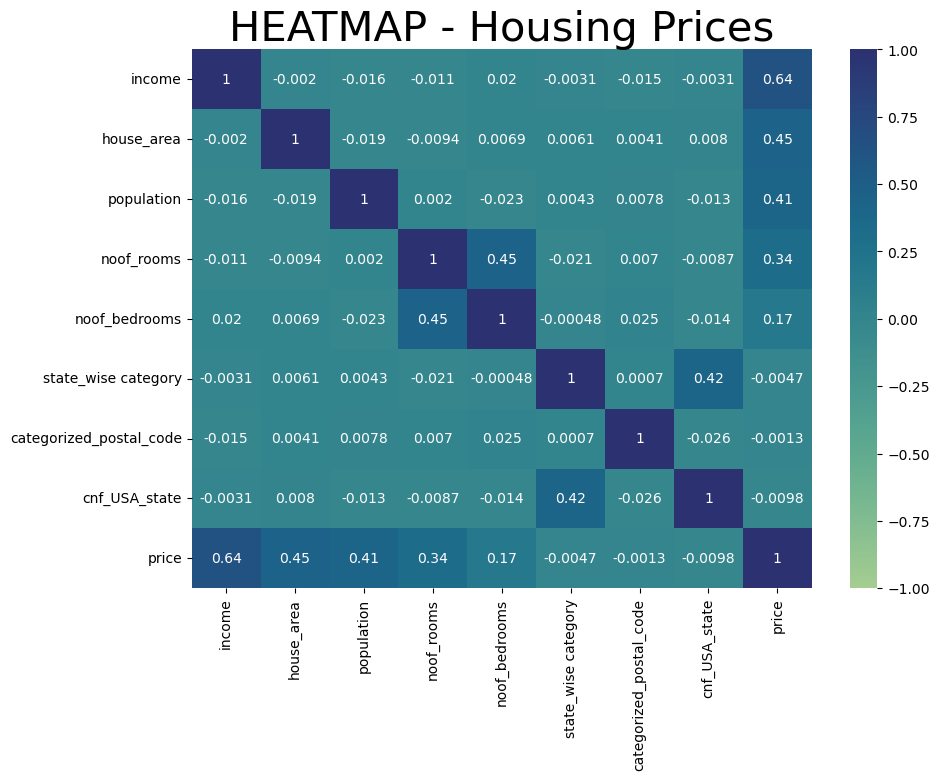

In [29]:
# heatmap correlation for the housing_df

# plot figure size 
plt.figure(figsize=(10,7))

# plotting the heatmap 
sns.heatmap(usa_housing_df.corr(),
           annot=True,
           vmin=-1,
           vmax=1,
           cmap='crest')

# giving the title for the heatmap 
plt.title("HEATMAP - Housing Prices",fontsize=30)

# displaying the heatmap
plt.show()

* Here we can see that the column `state_wise_encoded` has lowest of all correlation so I think it would be better if we could include only those features that tend more towards the negative `-1` or positive correlation `+1` 

* Since we have our new data here we should also check if these new data has any duplicated values in it or missing values or any null values though we couldn't find it in beginning

In [30]:
# opting for the features that I think we be a good fit for the data
df = usa_housing_df[['income','house_area','population','noof_rooms']]
cols = df.columns
cols

Index(['income', 'house_area', 'population', 'noof_rooms'], dtype='object')

In [31]:
# tranforming the numerical continous values into normalized values
mMs = MinMaxScaler()
normalise_df = mMs.fit_transform(df)
normalise_df


array([[0.68682217, 0.44198584, 0.3299422 , 0.50150158],
       [0.68352073, 0.48853836, 0.57596801, 0.46450137],
       [0.48373705, 0.46860901, 0.52858204, 0.70135011],
       ...,
       [0.50713527, 0.67002636, 0.47651494, 0.20853446],
       [0.55841872, 0.4203891 , 0.61128233, 0.51757886],
       [0.53071451, 0.48699729, 0.66708815, 0.47267788]])

In [32]:
# create a new dataframe that stores the normalized values
new_normalize_df = pd.DataFrame(normalise_df,columns=cols)

# adding the bedroom, state_wise_encoded columns back into the normalized df
new_normalize_df['noof_bedrooms'] = usa_housing_df['noof_bedrooms']
new_normalize_df['state_wise_encoded'] = usa_housing_df['state_wise category']
new_normalize_df['postal_code_categories'] = usa_housing_df['categorized_postal_code']
new_normalize_df

,income,house_area,population,noof_rooms,noof_bedrooms,state_wise_encoded,postal_code_categories
0,0.686822,0.441986,0.329942,0.501502,111,37,835
1,0.683521,0.488538,0.575968,0.464501,60,8,746
2,0.483737,0.468609,0.528582,0.701350,166,59,3694
3,0.506630,0.660956,0.491549,0.312430,77,4,1814
4,0.469223,0.348556,0.376988,0.611851,125,1,391
...,...,...,...,...,...,...,...
4995,0.475738,0.754359,0.326351,0.385619,97,4,1203
4996,0.675097,0.633450,0.366362,0.444024,104,0,3748
4997,0.507135,0.670026,0.476515,0.208534,13,55,1692
4998,0.558419,0.420389,0.611282,0.517579,197,1,2946


In [33]:
# adding the target variable to the data
new_normalize_df['price'] = price
new_normalize_df

,income,house_area,population,noof_rooms,noof_bedrooms,state_wise_encoded,postal_code_categories,price
0,0.686822,0.441986,0.329942,0.501502,111,37,835,1.059034e+06
1,0.683521,0.488538,0.575968,0.464501,60,8,746,1.505891e+06
2,0.483737,0.468609,0.528582,0.701350,166,59,3694,1.058988e+06
3,0.506630,0.660956,0.491549,0.312430,77,4,1814,1.260617e+06
4,0.469223,0.348556,0.376988,0.611851,125,1,391,6.309435e+05
...,...,...,...,...,...,...,...,...
4995,0.475738,0.754359,0.326351,0.385619,97,4,1203,1.060194e+06
4996,0.675097,0.633450,0.366362,0.444024,104,0,3748,1.482618e+06
4997,0.507135,0.670026,0.476515,0.208534,13,55,1692,1.030730e+06
4998,0.558419,0.420389,0.611282,0.517579,197,1,2946,1.198657e+06


## Heatmap for the Normalized data

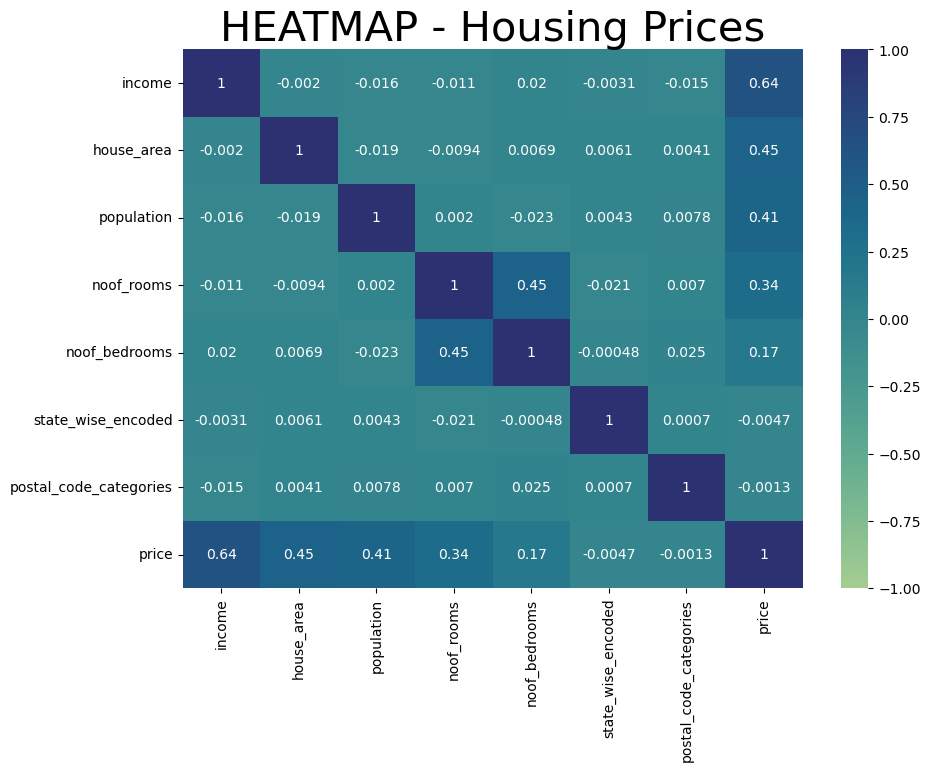

In [34]:
# plotting the heatmap
# heatmap correlation for the new_normalize_df

# plot figure size 
plt.figure(figsize=(10,7))

# plotting the heatmap 
sns.heatmap(new_normalize_df.corr(),
           annot=True,
           vmin=-1,
           vmax=1,
           cmap='crest')

# giving the title for the heatmap 
plt.title("HEATMAP - Housing Prices",fontsize=30)

# displaying the heatmap
plt.show()

In [35]:
# checking the duplicates
new_normalize_df.duplicated().sum()

0

In [36]:
# checking if there is any null values()
new_normalize_df.isna().sum()

income                    0
house_area                0
population                0
noof_rooms                0
noof_bedrooms             0
state_wise_encoded        0
postal_code_categories    0
price                     0
dtype: int64

Great now we can move forward with the data 

# 4 . Dividing the independent and dependent variables

In [37]:
# assigning the features to 'X' independent variable or features
X = new_normalize_df[['income','house_area','population','noof_rooms','noof_bedrooms']]

# dependent variable
y = new_normalize_df['price']

In [38]:
X

,income,house_area,population,noof_rooms,noof_bedrooms
0,0.686822,0.441986,0.329942,0.501502,111
1,0.683521,0.488538,0.575968,0.464501,60
2,0.483737,0.468609,0.528582,0.701350,166
3,0.506630,0.660956,0.491549,0.312430,77
4,0.469223,0.348556,0.376988,0.611851,125
...,...,...,...,...,...
4995,0.475738,0.754359,0.326351,0.385619,97
4996,0.675097,0.633450,0.366362,0.444024,104
4997,0.507135,0.670026,0.476515,0.208534,13
4998,0.558419,0.420389,0.611282,0.517579,197


In [39]:
y

0       1.059034e+06
1       1.505891e+06
2       1.058988e+06
3       1.260617e+06
4       6.309435e+05
            ...     
4995    1.060194e+06
4996    1.482618e+06
4997    1.030730e+06
4998    1.198657e+06
4999    1.298950e+06
Name: price, Length: 5000, dtype: float64

# 5 . Standardizing or Normalising the Data

In [40]:
# # Using the Standard scalar
# Ss = StandardScaler()

# # transforming the X to Ss
# X_Ss = Ss.fit_transform(X)

# # new standardized data
# print(X_Ss.shape)

# # df
# X_Ss = pd.DataFrame(X_Ss,columns=X.columns)

# # description
# X_Ss.describe()


In [41]:
# X_Ss

In [42]:
# # normalized data 
# mMs = MinMaxScaler()

# # tranforming the X to mMs
# X_mMs = mMs.fit_transform(X)

# # new normalized values
# print(X_mMs.shape)

# # df
# X_mMs = pd.DataFrame(X_mMs, columns=X.columns)

# # description
# X_mMs.describe()

In [43]:
# X_mMs

# Since we have already proceeded with the above step lets move onto the next step

# 6 . Plotting the Data

LinePlot

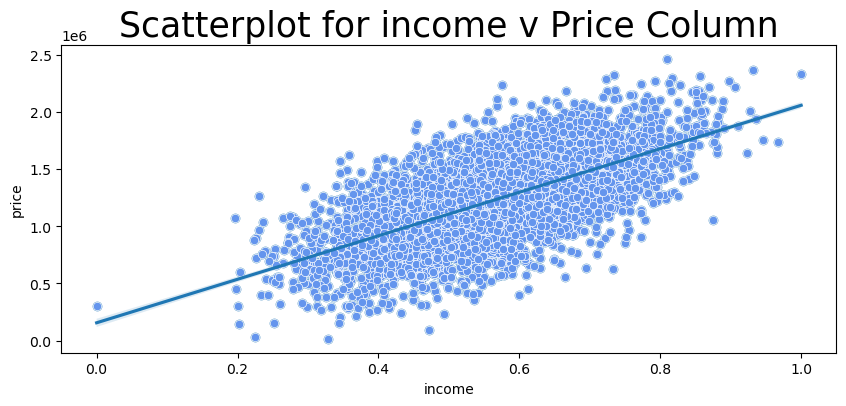

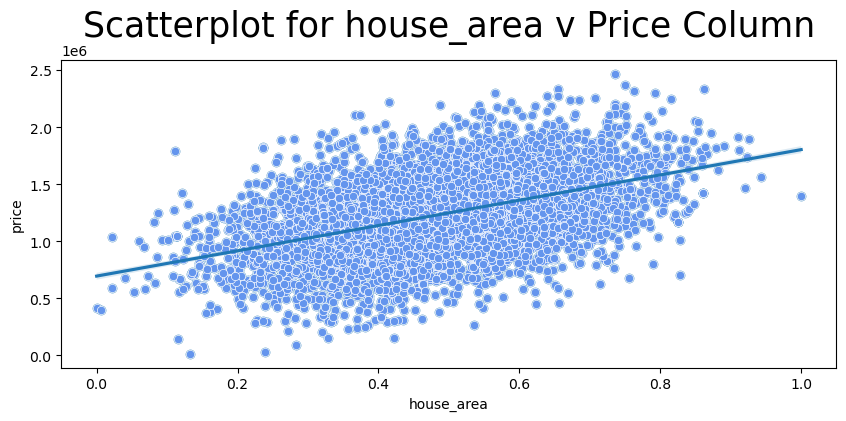

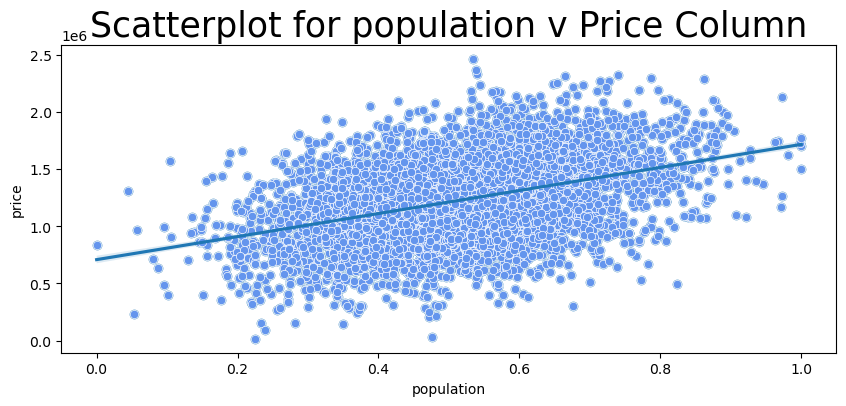

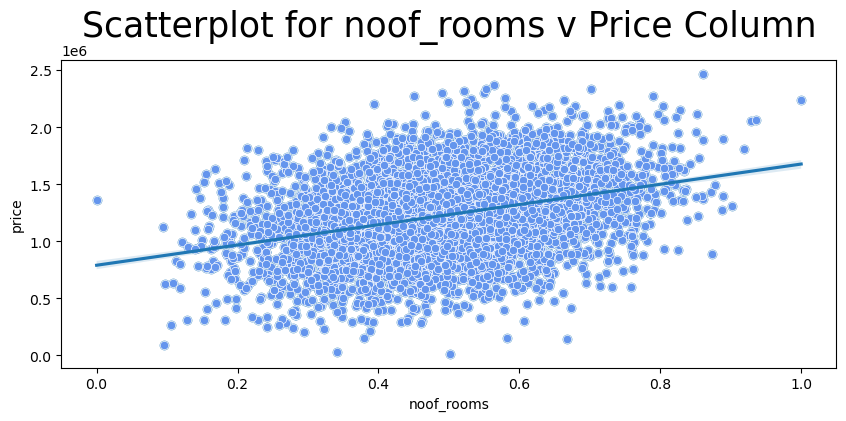

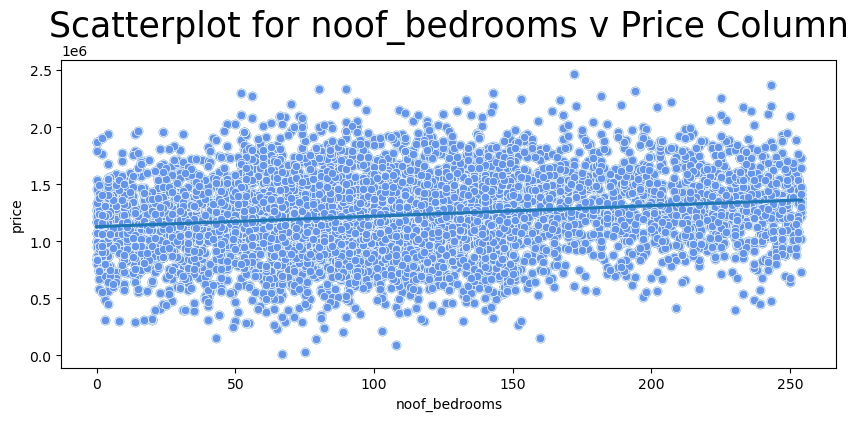

In [44]:
# lineplot 
for col in X.columns:
    
    plt.figure(figsize=(10,4)) 
    
    ax = sns.regplot(x = X[col] , y = y)
    
    sns.scatterplot(x = X[col] , y = y, color='cornflowerblue', ax=ax)
    
    plt.title(f"Scatterplot for {col} v Price Column",fontsize=25)
    
    plt.show()

    



From the above graph we can see that we are having a good correlation with these features however the column `state_wise_encoded` doesnt potray much significance in the data so it would be best if we could remove it

In [45]:
# X.drop(columns=['state_wise_encoded'],inplace=True)
# X

# Splitting the Data into Train and Test Set

In [46]:
# splitting the data
(X_train, X_test, y_train, y_test) = train_test_split(X, y , test_size=0.2, random_state=2020)
print(f"training Data Shape : {X_train.shape,y_train.shape}")
print(f"testing Data Shape : {X_test.shape,y_test.shape}")

training Data Shape : ((4000, 5), (4000,))
testing Data Shape : ((1000, 5), (1000,))


# Model Evaluation

We will using various models for fitting and testing and evaluate which model performs best and eventually we can choose that model and proceed with the model with a good test and train scores

In [47]:
# various regression models
regression_models = [
    LinearRegression(),
    BayesianRidge(),
    KNeighborsRegressor(),
    DecisionTreeRegressor(),# add parameters GridSearchCV 
    PoissonRegressor(),
    RandomForestRegressor(),
    XGBRegressor(),
    XGBRFRegressor(),
    ExtraTreeRegressor(),
    GradientBoostingRegressor()
]


In [48]:
# initializing a list to store the various different scores for the models
models_scores = []

# a function to see which regression model is best suited for this data
def models_evaluated():
    for reg_model in regression_models:
        
        # fit the model with the data
        model_eval = reg_model.fit(X_train, y_train)
        
        # prediciting the y_hat
        model_y_hat = model_eval.predict(X_test)
        
        # accuracy scores
        # model train score
        model_train_score = model_eval.score(X_train, y_train)
        # model test score
        model_test_score = model_eval.score(X_test, y_test)
        # mse_score
        mse_score = mean_squared_error(y_test,model_y_hat)
        # mae score
        mae_score = mean_absolute_error(y_test,model_y_hat)
        # r2 score 
        r2_score_m = r2_score(y_test,model_y_hat)
                
        # defining the items as list needed for the dict models_scores
        models_scores.append({'Model_Used':str(reg_model.__class__.__name__),
                'training_scores':model_train_score,
                'testing_scores':model_test_score,
               'R2_Score(test)':r2_score_m,
               'mse_score_test':mse_score,
               'mae_score_test':mae_score})
        
        #         # appending the values to the dictionary model scores
        #         for key, value in zip(models_scores.keys(), model_scores_list):
        #             models_scores[key].append(value)
        
    return models_scores


In [49]:
# converting this dictionary to dataframe
final_models_df = pd.DataFrame(models_evaluated())
final_models_df

,Model_Used,training_scores,testing_scores,R2_Score(test),mse_score_test,mae_score_test
0,LinearRegression,0.917763,0.918961,0.918961,9.905596e+09,79143.208930
1,BayesianRidge,0.917763,0.918962,0.918962,9.905429e+09,79142.687224
2,KNeighborsRegressor,0.674243,0.436525,0.436525,6.887450e+10,204480.467839
3,DecisionTreeRegressor,1.000000,0.748125,0.748125,3.078713e+10,140172.258127
4,PoissonRegressor,0.873860,0.875668,0.886505,1.387269e+10,91448.012511
5,RandomForestRegressor,0.983746,0.883184,0.883184,1.427858e+10,93303.051390
6,XGBRegressor,0.982309,0.877084,0.877084,1.502422e+10,96371.631711
7,XGBRFRegressor,0.856153,0.801599,0.801599,2.425086e+10,120489.056955
8,ExtraTreeRegressor,1.000000,0.724455,0.724455,3.368037e+10,145875.659627
9,GradientBoostingRegressor,0.928155,0.902297,0.902297,1.194242e+10,86005.692986


In [50]:
# sorting the regression models by their testing scores
final_models_df.sort_values(ascending=False, by=['testing_scores'], inplace=True)

# reseting the index
final_models_df.reset_index(inplace=True)

# dropping the index column
final_models_df.drop(columns=['index'],inplace=True)

final_models_df

,Model_Used,training_scores,testing_scores,R2_Score(test),mse_score_test,mae_score_test
0,BayesianRidge,0.917763,0.918962,0.918962,9.905429e+09,79142.687224
1,LinearRegression,0.917763,0.918961,0.918961,9.905596e+09,79143.208930
2,GradientBoostingRegressor,0.928155,0.902297,0.902297,1.194242e+10,86005.692986
3,RandomForestRegressor,0.983746,0.883184,0.883184,1.427858e+10,93303.051390
4,XGBRegressor,0.982309,0.877084,0.877084,1.502422e+10,96371.631711
5,PoissonRegressor,0.873860,0.875668,0.886505,1.387269e+10,91448.012511
6,XGBRFRegressor,0.856153,0.801599,0.801599,2.425086e+10,120489.056955
7,DecisionTreeRegressor,1.000000,0.748125,0.748125,3.078713e+10,140172.258127
8,ExtraTreeRegressor,1.000000,0.724455,0.724455,3.368037e+10,145875.659627
9,KNeighborsRegressor,0.674243,0.436525,0.436525,6.887450e+10,204480.467839


In [51]:
final_models_df['Model_Used']

0                BayesianRidge
1             LinearRegression
2    GradientBoostingRegressor
3        RandomForestRegressor
4                 XGBRegressor
5             PoissonRegressor
6               XGBRFRegressor
7        DecisionTreeRegressor
8           ExtraTreeRegressor
9          KNeighborsRegressor
Name: Model_Used, dtype: object

We can see that there are 3 models which performed well comparatively than others without using any paramters on the model with accuracies of :
* `1` : `91.89` , 
* `2` : `91.89`, 
* `3` : `90.23`
<ol>
    <li><b>Bayesian Regression</b></li>
    <li><b>Linear Regression</b></li>
    <li><b>Gradient Boosting Regressor</b></li>
</ol>

And we can see that the rest of the regressors have `overfitting` issues, however let us also try with `Decision Tree Regressor`

In [92]:
models_n_testing_scores = [{"Model_used":[None],
                          "R2 Score":[None]}]

# Bayesian Regression

In [52]:
# bayessian regression initialization and fitting the model
baye_reg_model = BayesianRidge().fit(X_train,y_train)

# yhat bayesian
bayesian_yhat = baye_reg_model.predict(X_test)

In [53]:
# training and testing score

print(f"Training score for Bayesian Regression : {baye_reg_model.score(X_train,y_train)}")
print(f"Testing score for Bayesian Regression : {baye_reg_model.score(X_test,y_test)}")


Training score for Bayesian Regression : 0.9177633232338686
Testing score for Bayesian Regression : 0.9189619005051035


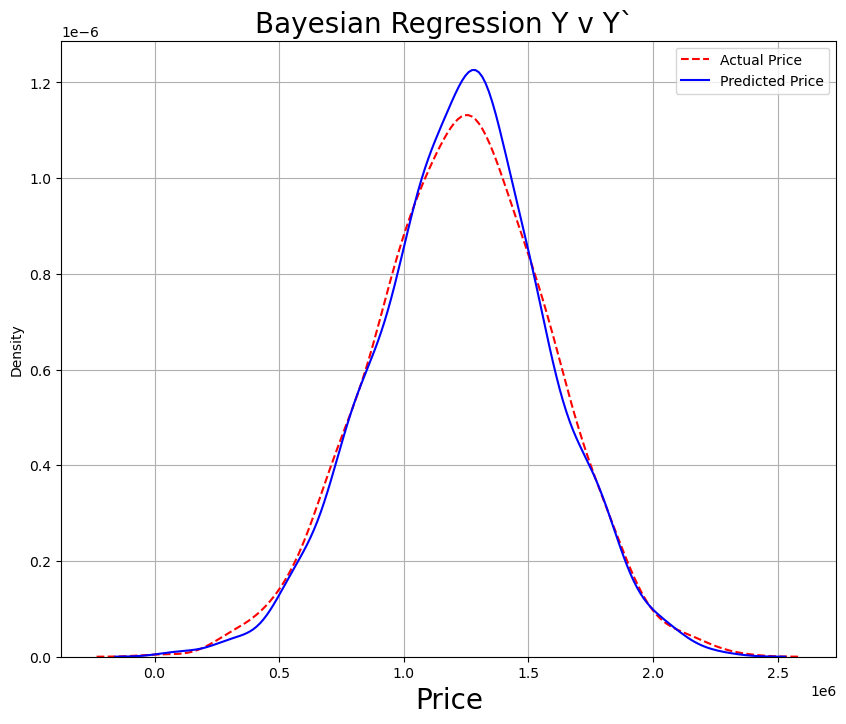

In [54]:
# Line plot between predicted and actual price

plt.figure(figsize=(10,8))

ax = sns.kdeplot(y_test, label='Actual Price', color='red', linestyle='--')

sns.kdeplot(bayesian_yhat,label='Predicted Price',color='blue',ax=ax)

plt.title("Bayesian Regression Y v Y` ", fontsize=20)
plt.xlabel("Price",fontsize=20)

plt.grid(True)
plt.legend()
plt.show()

### GridSearch CV for bayesian regression

In [55]:
# Define the parameter grid
param_grid = {
    'max_iter': [100, 300, 500, 700, 900, 1000], 
    'alpha_1': [1e-6, 1e-5, 1e-4],
    'alpha_2': [1e-6, 1e-5, 1e-4],
    'lambda_1': [1e-6, 1e-5, 1e-4],
    'lambda_2': [1e-6, 1e-5, 1e-4],
    'tol': [1e-3, 1e-4, 1e-5]
}

In [56]:
# gridsearchcv with bayesian regression
grids_cv = GridSearchCV(BayesianRidge(), 
                        param_grid=param_grid, 
                        scoring='r2', cv=5, n_jobs=-1)

# fitting the model with bayesian gridsearch cv
grids_cv.fit(X_train,y_train)

# prediciting grids_cv 
grids_cv_yhat = grids_cv.predict(X_test)

# display the best parameters from the given
print(grids_cv.best_params_)

# new convertion to df
grid_sch_cv_Brg_df = pd.DataFrame(grids_cv.cv_results_)

{'alpha_1': 1e-06, 'alpha_2': 1e-06, 'lambda_1': 0.0001, 'lambda_2': 1e-06, 'max_iter': 100, 'tol': 0.001}


In [57]:
# displaying the best ranks out there with there parameters used
grid_sch_cv_Brg_df[grid_sch_cv_Brg_df['rank_test_score']==1].head(2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha_1,param_alpha_2,param_lambda_1,param_lambda_2,param_max_iter,param_tol,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
108,0.005253,0.000983,0.002512,0.000845,0.000001,0.000001,0.0001,0.000001,100,0.0010,"{'alpha_1': 1e-06, 'alpha_2': 1e-06, 'lambda_1...",0.918134,0.918521,0.907576,0.919269,0.92256,0.917212,0.005065,1
109,0.004750,0.001186,0.002710,0.000513,0.000001,0.000001,0.0001,0.000001,100,0.0001,"{'alpha_1': 1e-06, 'alpha_2': 1e-06, 'lambda_1...",0.918134,0.918521,0.907576,0.919269,0.92256,0.917212,0.005065,1


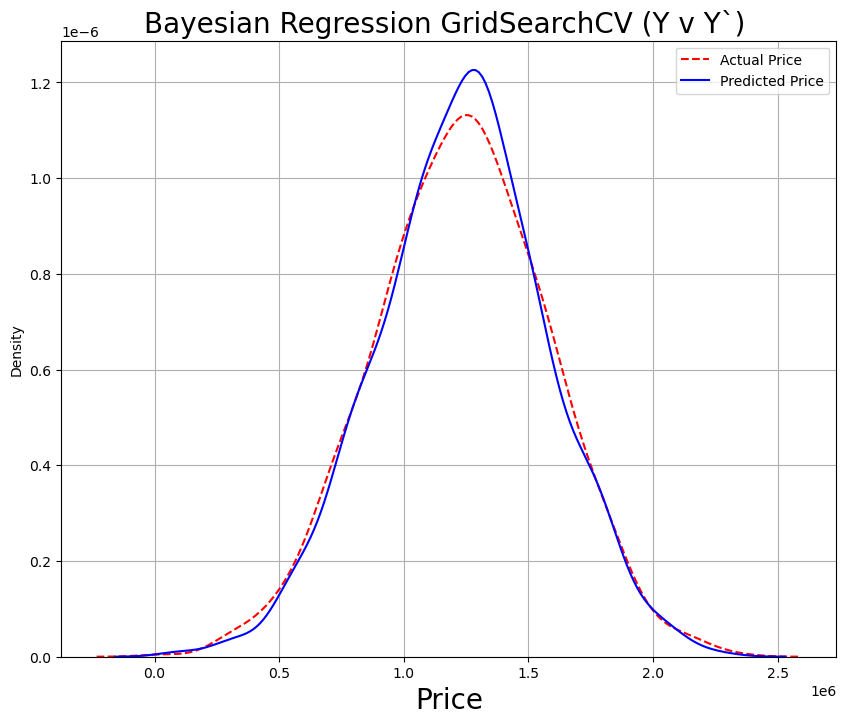

In [58]:
# Line plot between predicted and actual price

plt.figure(figsize=(10,8))

ax = sns.kdeplot(y_test, label='Actual Price', color='red', linestyle='--')

sns.kdeplot(grids_cv_yhat,label='Predicted Price',color='blue',ax=ax)

plt.title("Bayesian Regression GridSearchCV (Y v Y`) ", fontsize=20)
plt.xlabel("Price",fontsize=20)
plt.grid(True)
plt.legend()
plt.show()

In [79]:
# making a new model with the given best parameters
parameters ={'alpha_1': [1e-06], 
             'alpha_2': [1e-06], 
             'lambda_1': [0.0001], 
             'lambda_2': [1e-06], 
             'max_iter': [100], 
             'tol': [0.001]}

# initializing the object with bayesian ridge and the best parameter
grid_new_bys = GridSearchCV(estimator=BayesianRidge(),
                           param_grid=parameters,
                           cv=5, n_jobs=-1)

# fitting the model 
grid_new_bys.fit(X_train,y_train)

# yhat 
grid_new_bys_yhat = grid_new_bys.predict(X_test)

# testing score
## training and testing score
print(f"Training score for Bayesiian Regression : {grid_new_bys.score(X_train,y_train)}")
print(f"Testing score for Bayesian Regression : {grid_new_bys.score(X_test,y_test)}")

# accuracy scores
r2Score_byn = r2_score(y_test,grid_new_bys_yhat )
print(f"R2 Score : {r2Score_byn}")

Training score for Bayesiian Regression : 0.9177633232328972
Testing score for Bayesian Regression : 0.9189619005586471
R2 Score : 0.9189619005586471


In [94]:
models_n_testing_scores.append({"Model_used":'Bayesian Ridge',
                               "R2 Score":r2Score_byn})

### Polynomial Features for bayesian regression

In [59]:
# Define the pipeline
pipeline = Pipeline([
    ('polynomialfeatures', PolynomialFeatures()),
    ('bayesianridge', BayesianRidge())
])

# Define the parameter grid
param_grid = {
    'polynomialfeatures__degree': [1, 2, 3, 4, 5]  # Correct syntax
}


In [60]:


# gridsearchcv with pipeline1
grid_pipe = GridSearchCV(estimator=pipeline, 
                         param_grid=param_grid,
                        scoring='r2',
                        cv=5)

# fitting the model 
grid_pipe.fit(X_train,y_train)

# new results
grid_pipe_results = pd.DataFrame(grid_pipe.cv_results_)
    

In [61]:
grid_pipe_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_polynomialfeatures__degree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.017801,0.003933,0.004135,0.000865,1,{'polynomialfeatures__degree': 1},0.918134,0.918521,0.907576,0.919269,0.922560,0.917212,0.005065,1
1,0.022399,0.006466,0.004309,0.000749,2,{'polynomialfeatures__degree': 2},0.024179,0.006769,0.018027,0.039069,0.032520,0.024113,0.011245,5
2,0.080242,0.011885,0.004577,0.000613,3,{'polynomialfeatures__degree': 3},0.916761,0.917214,0.906365,0.919131,0.920791,0.916052,0.005053,2
3,0.121085,0.014100,0.004998,0.000273,4,{'polynomialfeatures__degree': 4},0.915857,0.916067,0.905078,0.918040,0.918966,0.914801,0.005002,3
4,0.204177,0.028984,0.006438,0.000904,5,{'polynomialfeatures__degree': 5},0.912843,0.914628,0.903902,0.917274,0.917442,0.913218,0.004964,4


In [62]:
# the y predict for the grid with pipeline with polynomial feature
grid_yhat_pipes = grid_pipe.predict(X_test)

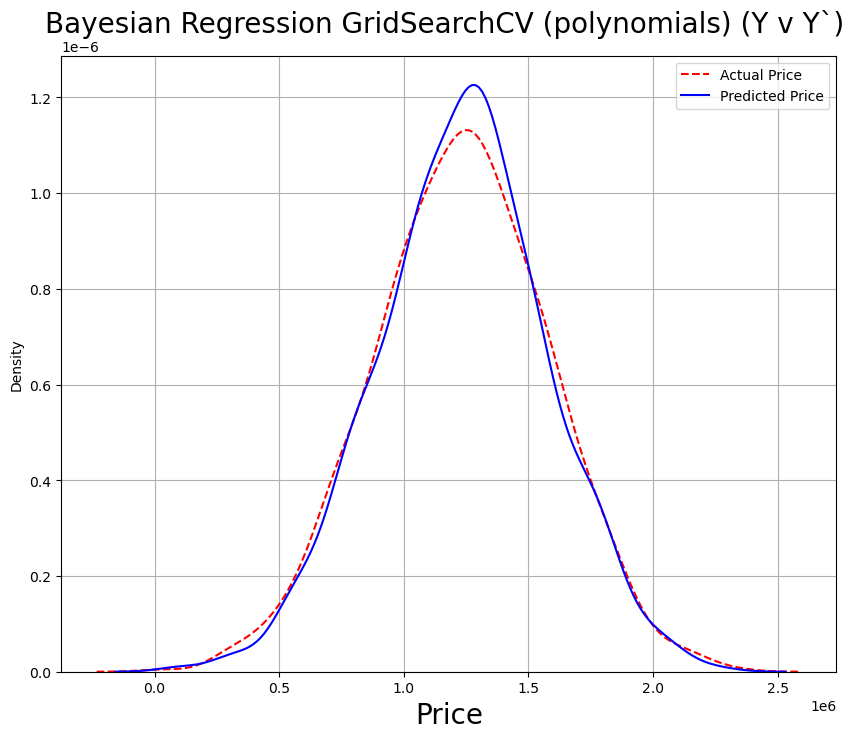

In [63]:
# Line plot between predicted and actual price

plt.figure(figsize=(10,8))

ax = sns.kdeplot(y_test, label='Actual Price', color='red', linestyle='--')

sns.kdeplot(grid_yhat_pipes,label='Predicted Price',color='blue',ax=ax)

plt.title("Bayesian Regression GridSearchCV (polynomials) (Y v Y`) ", fontsize=20)
plt.xlabel("Price",fontsize=20)
plt.grid(True)
plt.legend()
plt.show()

# Linear Regression

In [64]:
# initializing linear regression
Lr = LinearRegression()

# fitting the data 
Lr.fit(X_train, y_train)

# y_predict - linear regression
Lr_y_predict = Lr.predict(X_test)

## training and testing score
print(f"Training score for Linear Regression : {Lr.score(X_train,y_train)}")
print(f"Testing score for Linear Regression : {Lr.score(X_test,y_test)}")


Training score for Linear Regression : 0.917763335495789
Testing score for Linear Regression : 0.9189605362354953


In [65]:
final_models_df[final_models_df['Model_Used']=='LinearRegression']

,Model_Used,training_scores,testing_scores,R2_Score(test),mse_score_test,mae_score_test
1,LinearRegression,0.917763,0.918961,0.918961,9.905596e+09,79143.20893


In [66]:
# parameters 
coef = Lr.coef_ 
intercept = Lr.intercept_ 
mse = mean_squared_error(y_test, Lr_y_predict) 
r2 = r2_score(y_test, Lr_y_predict) 

print(f"Coefficients: {coef}") 
print(f"Intercept: {intercept}") 
print(f"Mean Squared Error: {mse}") 
print(f"R-squared: {r2}")

Coefficients: [1.94010518e+06 1.14597570e+06 1.05036433e+06 9.14922625e+05
 2.79140754e+01]
Intercept: -1422362.6532700951
Mean Squared Error: 9905595592.651926
R-squared: 0.9189605362354953


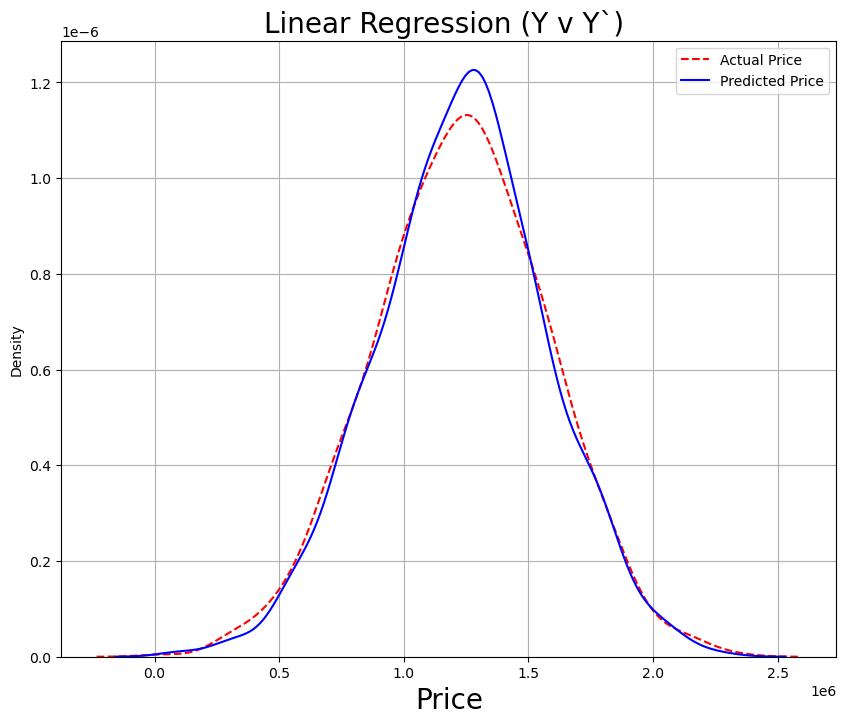

In [67]:
# Line plot between predicted and actual price

plt.figure(figsize=(10,8))

ax = sns.kdeplot(y_test, label='Actual Price', color='red', linestyle='--')

sns.kdeplot(Lr_y_predict,label='Predicted Price',color='blue',ax=ax)

plt.title("Linear Regression (Y v Y`) ", fontsize=20)
plt.xlabel("Price",fontsize=20)
plt.grid(True)
plt.legend()
plt.show()

In [95]:
models_n_testing_scores.append({"Model_used":'Linear Regression',
                               "R2 Score":r2})

As you can see both the models have made the best possible outcomes

# Gradient Boosting Regressor

In [68]:
# initializing the gradient boosting regressor
gbr = GradientBoostingRegressor()

# initializing the parameters for gbr
# Define the parameter 
gbr_param_grid = { 'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800], # Number of boosting stages 
                   'learning_rate': [0.01, 0.005, 0.1], # Learning rate 
                   'max_depth': [1,2,3], # Maximum depth of the individual trees 
                   'min_samples_split': [2,3,4,5], # Minimum number of samples required to split an internal node 
                   'min_samples_leaf': [1, 2, 3, 4, 5], # Minimum number of samples required to be at a leaf node 
                   'max_features': ['auto', 'sqrt', 'log2'], # Number of features to consider when looking for the best split
                   'loss': ['squared_error', 'absolute_error', 'huber', 'quantile']
}

# initializing the grid search cv
grid_search_cv = GridSearchCV(estimator = gbr,
                             param_grid = gbr_param_grid,
                             cv = 5, scoring='r2',n_jobs=-1) 

# fitting the model 
grid_search_cv.fit(X_train, y_train)

# y_predict for gbr_grid
gbr_predict = grid_search_cv.predict(X_test)

print(grid_search_cv.best_params_)

# outputing the final results into a variable
final_gbr_model_result = grid_search_cv.cv_results_

C:\Users\preda\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
28800 fits failed out of a total of 86400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15231 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\preda\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\preda\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "C:\Users\preda\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 436, in _validate_params
  

{'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 1, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 4, 'n_estimators': 700}


In [69]:
# converting the result to df from dict
final_models_df_gbr_model_result = pd.DataFrame.from_dict(final_gbr_model_result)

final_models_df_gbr_model_result[final_models_df_gbr_model_result['rank_test_score']==1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_loss,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
11830,4.958157,0.043209,0.021888,0.002322,0.1,squared_error,1,sqrt,5,4,700,"{'learning_rate': 0.1, 'loss': 'squared_error'...",0.913876,0.914616,0.903235,0.9142,0.915694,0.912324,0.004586,1


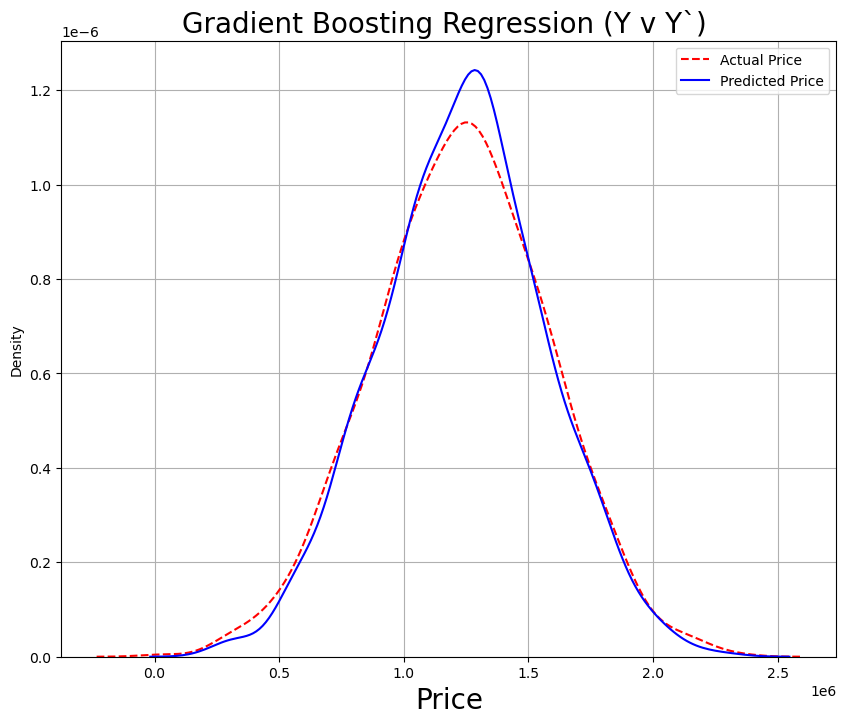

In [70]:
# Line plot between predicted and actual price

plt.figure(figsize=(10,8))

ax = sns.kdeplot(y_test, label='Actual Price', color='red', linestyle='--')

sns.kdeplot(gbr_predict, label='Predicted Price',color='blue',ax=ax)

plt.title("Gradient Boosting Regression (Y v Y`) ", fontsize=20)
plt.xlabel("Price",fontsize=20)
plt.grid(True)
plt.legend()
plt.show()

In [87]:
# initializing the gradient boosting regressor with the best parameter
parameters = {
    'learning_rate': [0.1], 
    'loss': ['squared_error'], 
    'max_depth': [1], 
    'max_features': ['sqrt'], 
    'min_samples_leaf': [5], 
    'min_samples_split': [4], 
    'n_estimators': [700]
}

# an object og gridsearchcv with best parameters 
grid_gbr2 = GridSearchCV(
    estimator=gbr,
    param_grid=parameters,
    cv=5,
    n_jobs=-1
)

# fitting the model
grid_gbr2.fit(X_train,y_train)

# yhat for gbr
yhat_gbr2 = grid_gbr2.predict(X_test)

# # testing score
## training and testing score
print(f"Training score for Gradient Boosting Regression : {grid_gbr2.score(X_train,y_train)}")
print(f"Testing score for Bayesian Regression : {grid_gbr2.score(X_test,y_test)}")

# accuracy scores
r2Score_gbr2 = r2_score(y_test,yhat_gbr2 )
print(f"R2 Score : {r2Score_gbr2}")

Training score for Gradient Boosting Regression : 0.9237130144964821
Testing score for Bayesian Regression : 0.9108316976668038
R2 Score : 0.9108316976668038


In [96]:
models_n_testing_scores.append({"Model_used":'Gradient Boosting Regression',
                               "R2 Score":r2Score_gbr2})

# Decision Tree Regressor

In [73]:
parameters = {
    'criterion':["squared_error", "friedman_mse", "absolute_error", "poisson"],
    'splitter' : ["best","random"],
    'max_depth':[None,1,2,3,4],
    'min_samples_split':[2,3,4,5],
    'min_samples_leaf':[1,2,3,4,5],
    'max_leaf_nodes':[1,2,3,4,5]
}

In [75]:
# initializing the model
dctr = DecisionTreeRegressor(random_state=53)

# initializing gridsearchcv
grid_dctr = GridSearchCV(
    estimator=dctr,
    param_grid = parameters,
    cv=5, n_jobs=-1
)

# fitting the data
grid_dctr.fit(X_train,y_train)

# yhat predict
grid_dctr_yhat = grid_dctr.predict(X_test)

# get the best parameters
print(f"Best Parameters : {grid_dctr.best_params_}")

# converting to a df
grid_dctr_df = pd.DataFrame.from_dict(grid_dctr.cv_results_)


C:\Users\preda\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
4000 fits failed out of a total of 20000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4000 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\preda\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\preda\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "C:\Users\preda\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 436, in _validate_params
    

Best Parameters : {'criterion': 'poisson', 'max_depth': None, 'max_leaf_nodes': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}


C:\Users\preda\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_search.py:1107: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan ... 0.27073053 0.43175432 0.27073053]
  warnings.warn(


In [76]:
grid_dctr_df[grid_dctr_df['rank_test_score']==1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_leaf_nodes,param_min_samples_leaf,param_min_samples_split,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
3160,0.039496,0.003218,0.008155,0.001947,poisson,None,5,1,2,best,"{'criterion': 'poisson', 'max_depth': None, 'm...",0.411569,0.472139,0.406236,0.474257,0.39457,0.431754,0.034289,1
3162,0.038818,0.002107,0.007859,0.002320,poisson,None,5,1,3,best,"{'criterion': 'poisson', 'max_depth': None, 'm...",0.411569,0.472139,0.406236,0.474257,0.39457,0.431754,0.034289,1
3164,0.041224,0.002498,0.009022,0.002143,poisson,None,5,1,4,best,"{'criterion': 'poisson', 'max_depth': None, 'm...",0.411569,0.472139,0.406236,0.474257,0.39457,0.431754,0.034289,1
3166,0.036574,0.003376,0.007940,0.001650,poisson,None,5,1,5,best,"{'criterion': 'poisson', 'max_depth': None, 'm...",0.411569,0.472139,0.406236,0.474257,0.39457,0.431754,0.034289,1
3168,0.037725,0.005475,0.007281,0.002154,poisson,None,5,2,2,best,"{'criterion': 'poisson', 'max_depth': None, 'm...",0.411569,0.472139,0.406236,0.474257,0.39457,0.431754,0.034289,1
3170,0.039015,0.002326,0.006002,0.002912,poisson,None,5,2,3,best,"{'criterion': 'poisson', 'max_depth': None, 'm...",0.411569,0.472139,0.406236,0.474257,0.39457,0.431754,0.034289,1
3172,0.038461,0.005484,0.007161,0.002437,poisson,None,5,2,4,best,"{'criterion': 'poisson', 'max_depth': None, 'm...",0.411569,0.472139,0.406236,0.474257,0.39457,0.431754,0.034289,1
3174,0.037954,0.003540,0.007942,0.001756,poisson,None,5,2,5,best,"{'criterion': 'poisson', 'max_depth': None, 'm...",0.411569,0.472139,0.406236,0.474257,0.39457,0.431754,0.034289,1
3176,0.039939,0.003371,0.006426,0.002080,poisson,None,5,3,2,best,"{'criterion': 'poisson', 'max_depth': None, 'm...",0.411569,0.472139,0.406236,0.474257,0.39457,0.431754,0.034289,1
3178,0.038276,0.006084,0.006279,0.000924,poisson,None,5,3,3,best,"{'criterion': 'poisson', 'max_depth': None, 'm...",0.411569,0.472139,0.406236,0.474257,0.39457,0.431754,0.034289,1


# Final models and test result 

In [104]:
models_n_testing_scores = pd.DataFrame.from_dict(models_n_testing_scores)
# models_n_testing_scores.drop(index=[0,1],axis=0,inplace=True).reset_index()
# models_n_testing_scores.drop(columns=['index'],inplace=True)
models_n_testing_scores

,Model_used,R2 Score
2,Bayesian Ridge,0.918962
3,Linear Regression,0.918961
4,Gradient Boosting Regression,0.910832
